In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import random as rd
import copy
import time
from diffusion_models import Weighted_Cascade, Independent_Cascade, Decreasing_Cascade, linear_threshold, general_threshold, Trivalency_Model_Higher_Prob

In [5]:
max_nodes_IC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'AWallfred', 'pullarkkat', 's817m', 'Somerled10', 'CodyBarnes13', 'GunsGodandTexas']
times_IC = [10.741265773773193, 236.766015291214, 627.04882645607, 1146.5669751167297, 1785.7016961574554, 2523.2258718013763, 3351.641788005829, 4245.376266717911, 5212.538978815079, 6237.875088214874, 7317.844819784164, 8447.575536966324, 9625.548919200897, 10851.33715724945, 12123.000044822693, 13442.503648996353, 14809.777120113373, 16218.910614013672, 17672.560995817184, 19170.619923830032]
max_nodes_DC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'RoryWeb1', 'fidelbogen', 'HomeCoffeeGeek', 'DeathsquadMn', 'ZvoneCizl', 'JuanYsidroGalva']
times_DC = [14.71357774734497, 341.92752385139465, 883.5976860523224, 1604.629472732544, 2461.862696647644, 3426.686062335968, 4488.1514637470245, 5628.830832004547, 6839.51228928566, 8111.640333890915, 9430.324719429016, 10844.845517396927, 12300.381844520569, 13789.093884468079, 15337.097647666931, 16933.31753540039, 18599.448838949203, 20311.356774568558, 22050.487572193146, 23826.209863185883]
max_nodes_WC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'ColoradoPOYB', 'maver_michael', 'Father_Rhyme', 'PrismicTitan', 'LOLA_WTO_Brexit', 'BlackGoatWhite', 'drjosuemd', 'JoelleClosset', 'BEARDTRIBE']
times_WC = [10.501221656799316, 235.98831987380981, 625.4327020645142, 1132.241504907608, 1809.7334263324738, 2598.581643819809, 3467.8672041893005, 4406.797207117081, 5355.24767780304, 6342.11412024498, 7458.015537261963, 8603.017973661423, 9797.863656759262, 11074.132063627243, 12310.55555319786, 13591.142619132996, 14951.905377626419, 16330.707174301147, 17719.568944215775, 19143.71673488617]
max_nodes_TR = ['principe_giovan', 'Premises187', 'Smithyon2wheels', 'MoralDK', 'cajunQueeen', 'proudboy_', 'emptysupeisu', 'UPSTATEALTRIGHT', 'chillitsjusttwi', 'CarverJonny', 'MMartzoukos', 'fashy_whiteguy', 'real_proxy', 'RizedemonzzAdam', 'loganirvine1231', 'tysaltey', 'ferhaterin', 'Proverted1', 'ilovemaan24', 'Hank_Rudr']
times_TR = [10.492323160171509, 115.49790549278259, 299.4437050819397, 508.73262119293213, 799.4249265193939, 1199.6988632678986, 1598.3100283145905, 2039.9739203453064, 2505.0265510082245, 2991.5065743923187, 3513.6140117645264, 4096.3409168720245, 4695.750593185425, 5321.801153182983, 5984.759743690491, 6687.2295026779175, 7436.344049692154, 8224.791092157364, 9045.267395496368, 9899.315313339233]
times_LT = [23.280896425247192, 4712.373671770096, 12369.735314130783, 22337.77462410927]
max_nodes_LT = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_']
max_nodes_GT = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_']
times_GT = [18.407705545425415, 4388.646020650864, 11171.983466386795, 19730.343330144882]

In [2]:
g = nx.read_gml('PB2020.gml')
g = g.reverse()

In [3]:
IC = Independent_Cascade()
IC.fit(g)
DC = Decreasing_Cascade()
DC.fit(g)
WC = Weighted_Cascade()
WC.fit(g)
TR = Trivalency_Model_Higher_Prob()
TR.fit(g)
LT = linear_threshold()
LT.fit(g)
GT = general_threshold()
GT.fit(g)

In [18]:
num_nodes_IC = []
for i in range(len(max_nodes_IC)):
    num_nodes_IC.append(sum(IC.monte_carlo_diffusion_all(max_nodes_IC[:i+1], 1000)))
print('num of nodes IC get',num_nodes_IC)

num of nodes IC get [827.5349999999999, 1160.7930000000003, 1460.264, 1585.1830000000002, 1649.4319999999998, 1684.574, 1728.736, 1738.186, 1760.7920000000001, 1778.974, 1796.297, 1806.3419999999999, 1810.137, 1813.1699999999998, 1814.277, 1815.1609999999998, 1816.1159999999998, 1816.971, 1818.3010000000002, 1819.6709999999998]


In [7]:
num_nodes_IC = [852.751, 1150.7690000000002, 1458.0159999999998, 1579.5370000000003, 1650.5880000000002, 1684.597, 1725.89, 1738.6309999999999, 1761.086, 1779.183, 1796.358, 1806.19, 1810.1879999999999, 1813.183, 1814.281, 1815.154, 1816.007, 1817.0349999999999, 1818.257, 1819.624]

In [20]:
num_nodes_DC = []
for i in range(len(max_nodes_DC)):
    num_nodes_DC.append(sum(DC.monte_carlo_diffusion_all(max_nodes_DC[:i+1], 1000)))
print('num of nodes DC get',num_nodes_DC)

num of nodes DC get [846.6270000000001, 1151.7049999999997, 1462.5299999999997, 1584.179, 1648.885, 1681.213, 1726.933, 1739.5270000000003, 1761.28, 1779.094, 1796.367, 1806.137, 1810.167, 1813.1850000000002, 1814.4220000000003, 1815.5059999999999, 1816.532, 1817.5549999999998, 1818.4499999999998, 1819.4450000000002]


In [8]:
num_nodes_DC = [834.283, 1141.6890000000003, 1457.1900000000003, 1577.4130000000002, 1646.0580000000002, 1684.0010000000002, 1726.124, 1738.791, 1761.521, 1779.0269999999998, 1796.119, 1806.158, 1810.0859999999998, 1813.117, 1814.298, 1815.433, 1816.3350000000003, 1817.5539999999999, 1818.61, 1819.343]

In [22]:
num_nodes_WC = []
for i in range(len(max_nodes_WC)):
    num_nodes_WC.append(sum(WC.monte_carlo_diffusion_all(max_nodes_WC[:i+1], 1000)))
print('num of nodes WC get',num_nodes_WC)

num of nodes WC get [552.702, 900.5830000000001, 1137.433, 1330.687, 1436.26, 1528.7949999999998, 1589.973, 1629.959, 1664.7990000000002, 1678.572, 1687.5520000000001, 1693.856, 1694.864, 1701.826, 1703.14, 1703.898, 1705.017, 1706.231, 1706.902, 1708.292]


In [9]:
num_nodes_WC = [552.774, 901.1519999999999, 1138.9859999999999, 1330.17, 1435.2359999999999, 1528.3799999999999, 1591.0880000000002, 1629.618, 1665.011, 1678.704, 1687.8870000000002, 1693.5130000000001, 1695.1490000000001, 1701.986, 1702.9660000000001, 1704.2350000000001, 1704.9769999999999, 1706.31, 1707.13, 1707.7939999999999]

In [6]:
num_nodes_TR = []
for i in range(len(max_nodes_TR)):
    num_nodes_TR.append(sum(TR.monte_carlo_diffusion_all(max_nodes_TR[:i+1], 1000)))
print('num of nodes TR get',num_nodes_TR)

num of nodes TR get [207.96300000000002, 306.60900000000004, 308.87600000000003, 393.389, 397.2150000000001, 442.95599999999996, 447.02299999999997, 448.133, 450.73500000000007, 450.971, 450.791, 451.273, 453.442, 453.67199999999997, 455.78200000000004, 457.01700000000005, 458.56399999999996, 458.703, 460.988, 472.4169999999999]


In [10]:
num_nodes_TR =  [207.96300000000002, 306.60900000000004, 308.87600000000003, 393.389, 397.2150000000001, 442.95599999999996, 447.02299999999997, 448.133, 450.73500000000007, 450.971, 450.791, 451.273, 453.442, 453.67199999999997, 455.78200000000004, 457.01700000000005, 458.56399999999996, 458.703, 460.988, 472.4169999999999]

In [65]:
num_nodes_LT = []
for i in range(len(max_nodes_LT)):
    num_nodes_LT.append(sum(LT.diffusion_all(max_nodes_LT[:i+1])[1]))
print('num of nodes LT get',num_nodes_LT)

num of nodes LT get [1342, 1684, 1684, 1684]


In [11]:
num_nodes_LT = [1342, 1684, 1684, 1684]

In [66]:
num_nodes_GT = []
for i in range(len(max_nodes_GT)):
    num_nodes_GT.append(sum(GT.diffusion_all(max_nodes_GT[:i+1])[1]))
print('num of nodes GT get',num_nodes_GT)

num of nodes GT get [721, 1070, 1359, 1548]


In [12]:
num_nodes_GT =  [721, 1070, 1359, 1548]

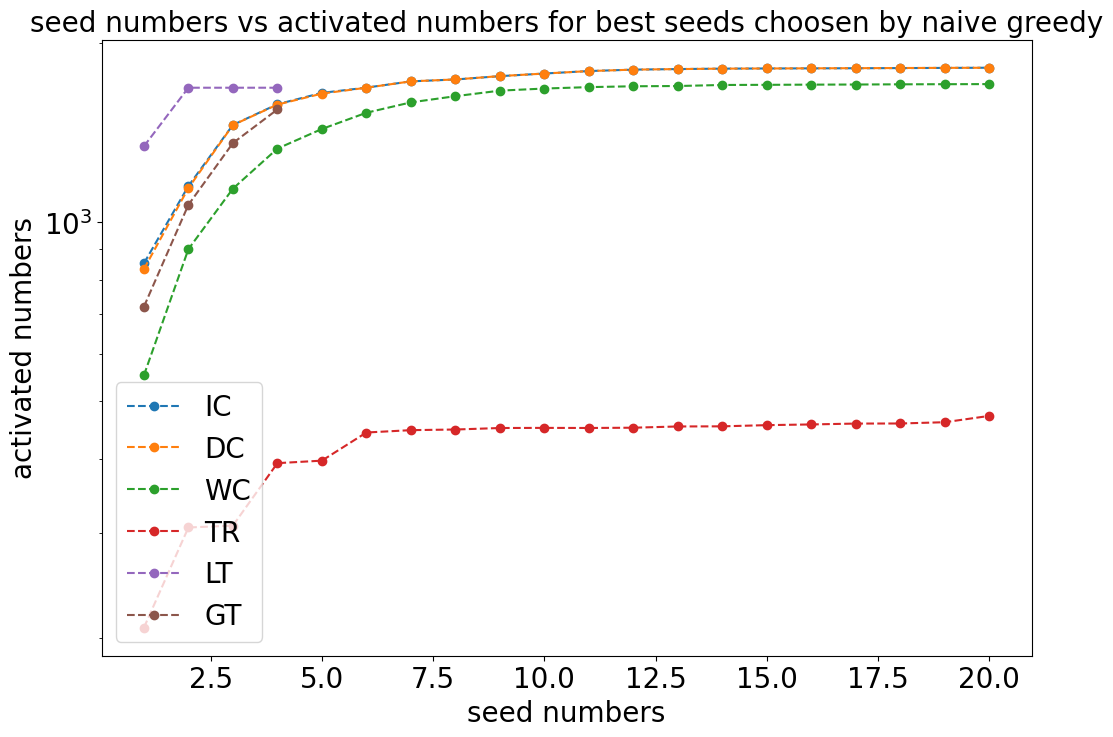

In [13]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(num_nodes_IC)+1), num_nodes_IC, 'o--', label='IC')
plt.plot(np.arange(1, len(num_nodes_DC)+1), num_nodes_DC, 'o--', label='DC')
plt.plot(np.arange(1, len(num_nodes_WC)+1), num_nodes_WC, 'o--', label='WC')
plt.plot(np.arange(1, len(num_nodes_TR)+1), num_nodes_TR, 'o--', label='TR')
plt.plot(np.arange(1, len(num_nodes_LT)+1), num_nodes_LT, 'o--', label='LT')
plt.plot(np.arange(1, len(num_nodes_GT)+1), num_nodes_GT, 'o--', label='GT')

plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('activated numbers', fontsize=20)
plt.title('seed numbers vs activated numbers for best seeds choosen by naive greedy', fontsize=20)
plt.legend(fontsize=20)